In [1]:
%load_ext autoreload
%matplotlib inline

# Data exploration with new data 

Received 10 more months of data from 2015-06-22 to 2016-04-12

In [2]:
import os, sys
import numpy as np
import pandas as pd
from IPython.display import display
sys.path.append(os.path.abspath(os.path.join('..')))

import plot.anomalies, plot.data
from plot import pyplot as plt
from database.CERNMongoClient import CERNMongoClient
import pipeline.pipeline as pipeline
from evaluation import evaluation, segmentation
from feature_extraction import feature_extraction, preprocessing

db = CERNMongoClient()

# auto-load changes in imported modules
%autoreload 2

##  Labels

In [3]:
labels = db.query_elogbook()

display("LABEL COUNTS", labels.groupby("TAG").sum())

display("BEAM 1", labels.query("BEAM == 1").groupby("TAG").sum())
display("BEAM 2", labels.query("BEAM == 2").groupby("TAG").sum())

Fetching data for pattern MKI.ELOGBOOK_tagged from 2015-06-22 00:00:00 to 2016-09-14 00:00:00
Fetching data for MKI.ELOGBOOK_tagged



'LABEL COUNTS'

BEAM
TAG               
anomaly         47
fault           45
info           209
intervention    95
research        30

'BEAM 1'

BEAM
TAG               
anomaly         23
fault           11
info            75
intervention    33
research        10

'BEAM 2'

BEAM
TAG               
anomaly         24
fault           34
info           134
intervention    62
research        20

## Continuous data

Fetching data for pattern .*B1:TEMP_MAGNET_UP$ from 2015-06-22 00:00:00 to 2016-09-14 00:00:00
Fetching data for MKI.A5L2.B1:TEMP_MAGNET_UP
Fetching data for MKI.D5L2.B1:TEMP_MAGNET_UP
Fetching data for MKI.C5L2.B1:TEMP_MAGNET_UP
Fetching data for MKI.B5L2.B1:TEMP_MAGNET_UP



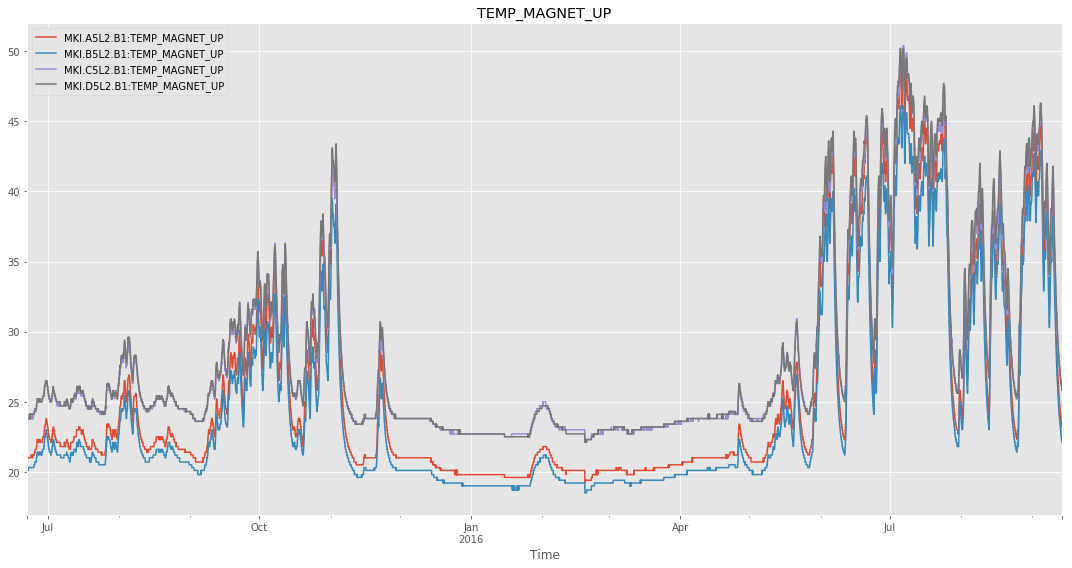

In [23]:
plot.data.continuous(db.query(".*B1:TEMP_MAGNET_UP$", filters=True, resample_to="10min"), "TEMP_MAGNET_UP")

Fetching data for pattern .*B1:TEMP_MAGNET_UP$ from 2016-04 to 2016-09-14 00:00:00
Fetching data for MKI.A5L2.B1:TEMP_MAGNET_UP
Fetching data for MKI.D5L2.B1:TEMP_MAGNET_UP
Fetching data for MKI.C5L2.B1:TEMP_MAGNET_UP
Fetching data for MKI.B5L2.B1:TEMP_MAGNET_UP



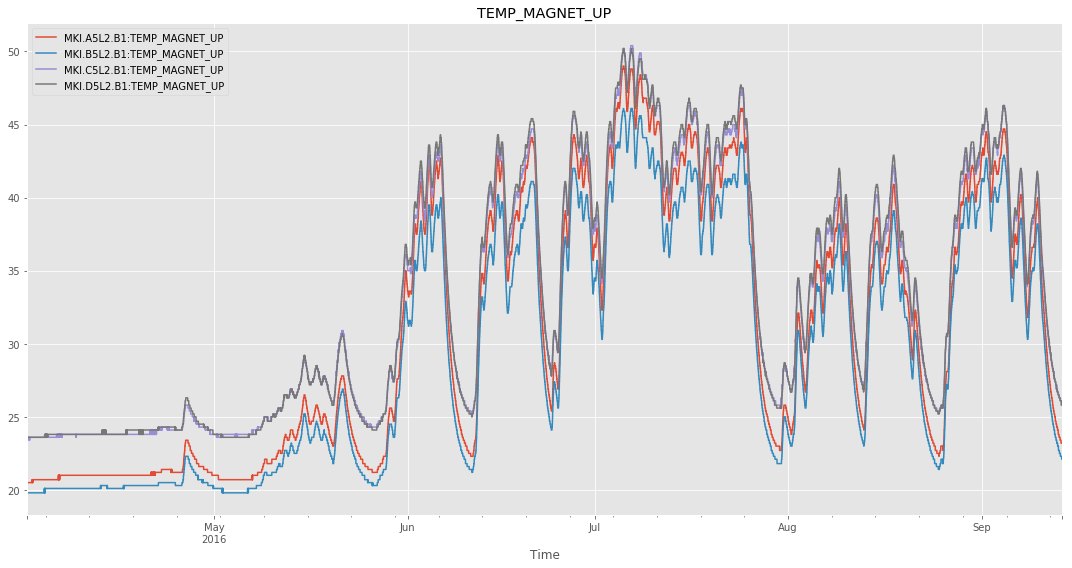

In [32]:
plot.data.continuous(db.query(".*B1:TEMP_MAGNET_UP$", start="2016-04", filters=True, resample_to="1min"), "TEMP_MAGNET_UP")

Fetching data for pattern .*B1:PRESSURE$ from 2015-06-22 00:00:00 to 2016-09-14 00:00:00
Fetching data for MKI.D5L2.B1:PRESSURE
Fetching data for MKI.B5L2.B1:PRESSURE
Fetching data for MKI.C5L2.B1:PRESSURE
Fetching data for MKI.A5L2.B1:PRESSURE



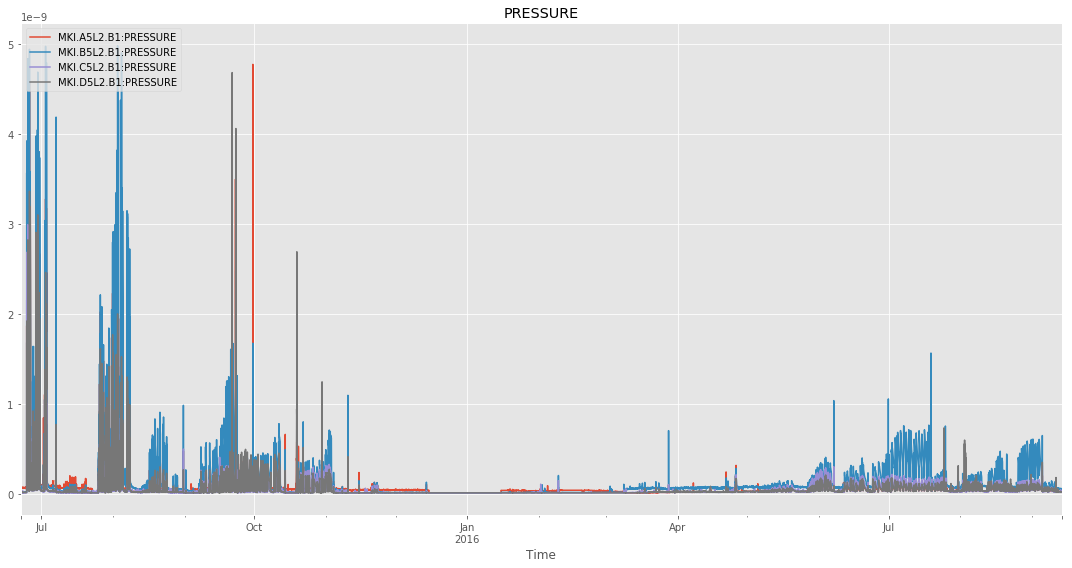

In [33]:
plot.data.continuous(db.query(".*B1:PRESSURE$", filters=True, resample_to="10min"), "PRESSURE")

Fetching data for pattern .*B1:PRESSURE$ from 2016-04 to 2016-09-14 00:00:00
Fetching data for MKI.D5L2.B1:PRESSURE
Fetching data for MKI.B5L2.B1:PRESSURE
Fetching data for MKI.C5L2.B1:PRESSURE
Fetching data for MKI.A5L2.B1:PRESSURE



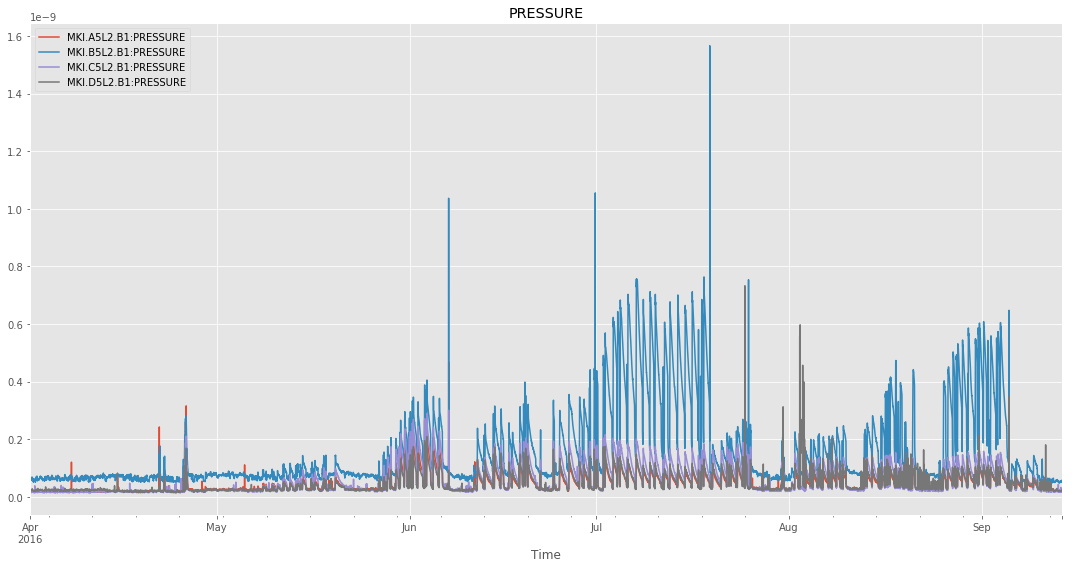

In [34]:
plot.data.continuous(db.query(".*B1:PRESSURE$", start="2016-04", filters=True, resample_to="10min"), "PRESSURE")

Fetching data for pattern .*B1:BEAM_INTENSITY$ from 2015-06-22 00:00:00 to 2016-09-14 00:00:00
Fetching data for LHC.BCTFR.A6R4.B1:BEAM_INTENSITY



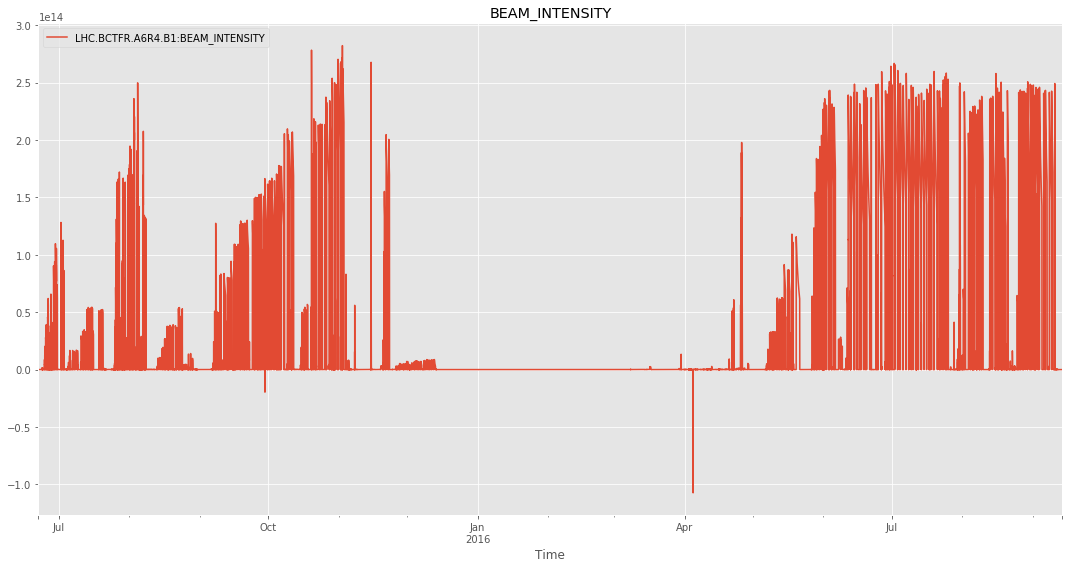

In [36]:
plot.data.continuous(db.query(".*B1:BEAM_INTENSITY$", filters=True, resample_to="1min"), "BEAM_INTENSITY")

Fetching data for pattern .*B1:BEAM_INTENSITY$ from 2016-04 to 2016-09-14 00:00:00
Fetching data for LHC.BCTFR.A6R4.B1:BEAM_INTENSITY



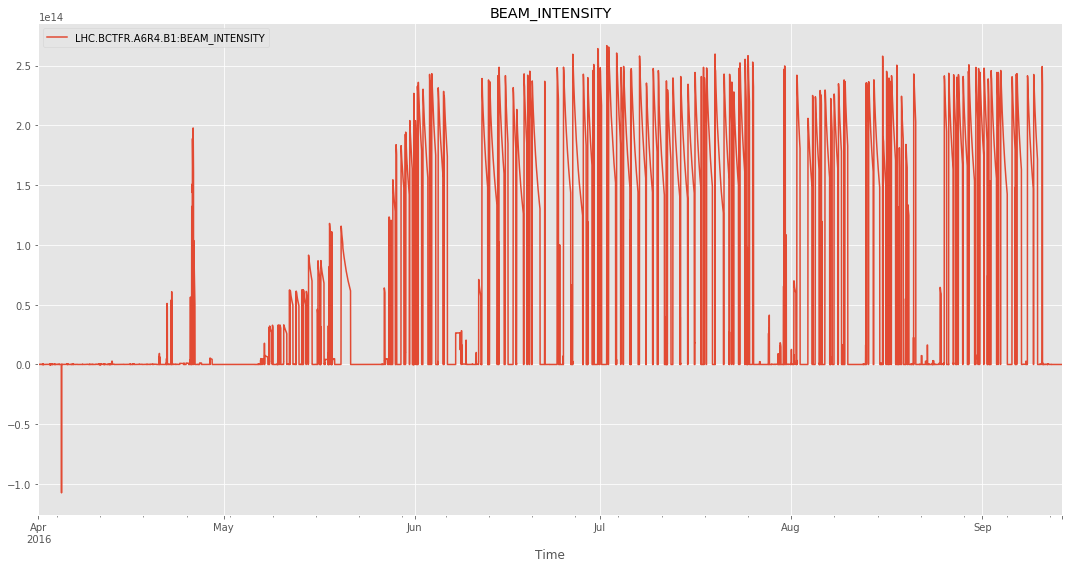

In [37]:
plot.data.continuous(db.query(".*B1:BEAM_INTENSITY$", start="2016-04", filters=True, resample_to="1min"), "BEAM_INTENSITY")

Fetching data for pattern .*B1:BUNCH_LENGTH_MEAN$ from 2015-06-22 00:00:00 to 2016-09-14 00:00:00
Fetching data for LHC.BQM.B1:BUNCH_LENGTH_MEAN



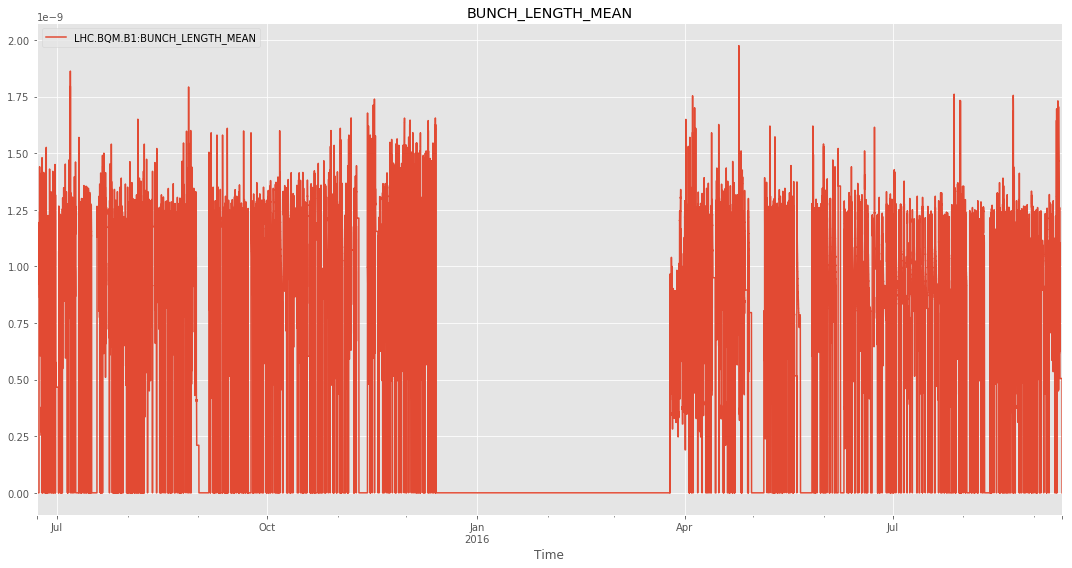

In [43]:
plot.data.continuous(db.query(".*B1:BUNCH_LENGTH_MEAN$", filters=True, resample_to="1min"), "BUNCH_LENGTH_MEAN")

Fetching data for pattern .*B1:BUNCH_LENGTH_MEAN$ from 2016-04 to 2016-09-14 00:00:00
Fetching data for LHC.BQM.B1:BUNCH_LENGTH_MEAN



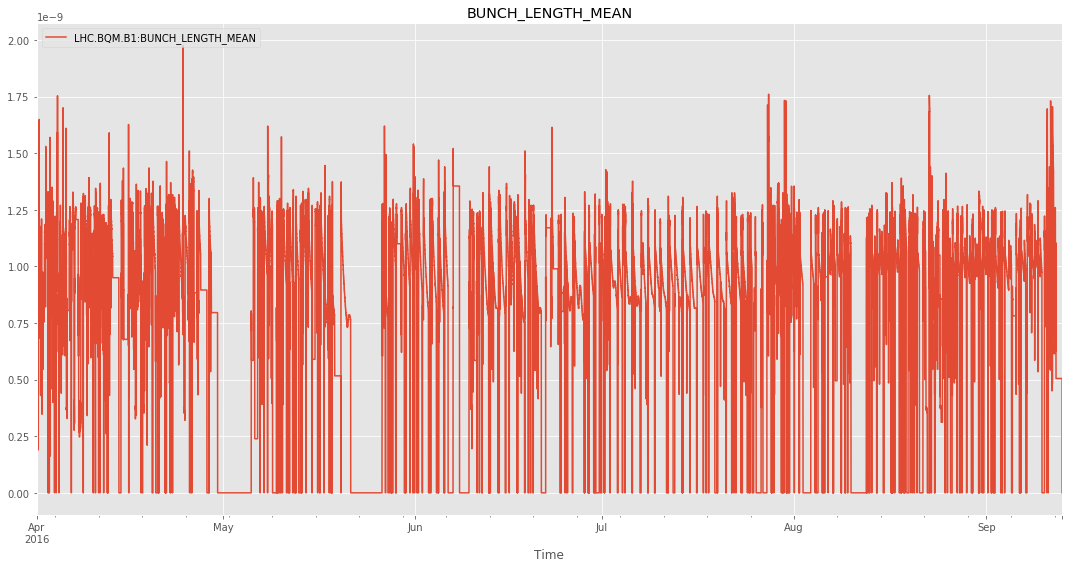

In [44]:
plot.data.continuous(db.query(".*B1:BUNCH_LENGTH_MEAN$", start="2016-04", filters=True, resample_to="1min"), "BUNCH_LENGTH_MEAN")

## IPOC data

Fetching data for pattern .*IPOC.*AB1:E_KICK$ from 2015-06-22 00:00:00 to 2016-09-14 00:00:00
Fetching data for MKI.UA23.IPOC.AB1:E_KICK



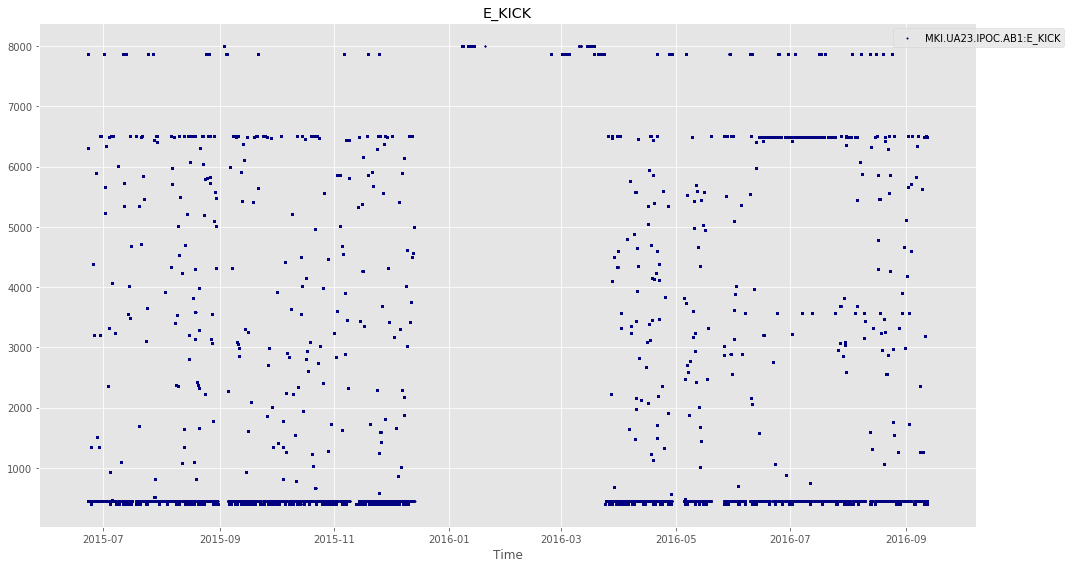

In [45]:
plot.data.ipoc(db.query(".*IPOC.*AB1:E_KICK$"), "E_KICK")

Fetching data for pattern .*IPOC.*AB1:I_STRENGTH$ from 2015-06-22 00:00:00 to 2016-09-14 00:00:00
Fetching data for MKI.UA23.IPOC.AB1:I_STRENGTH



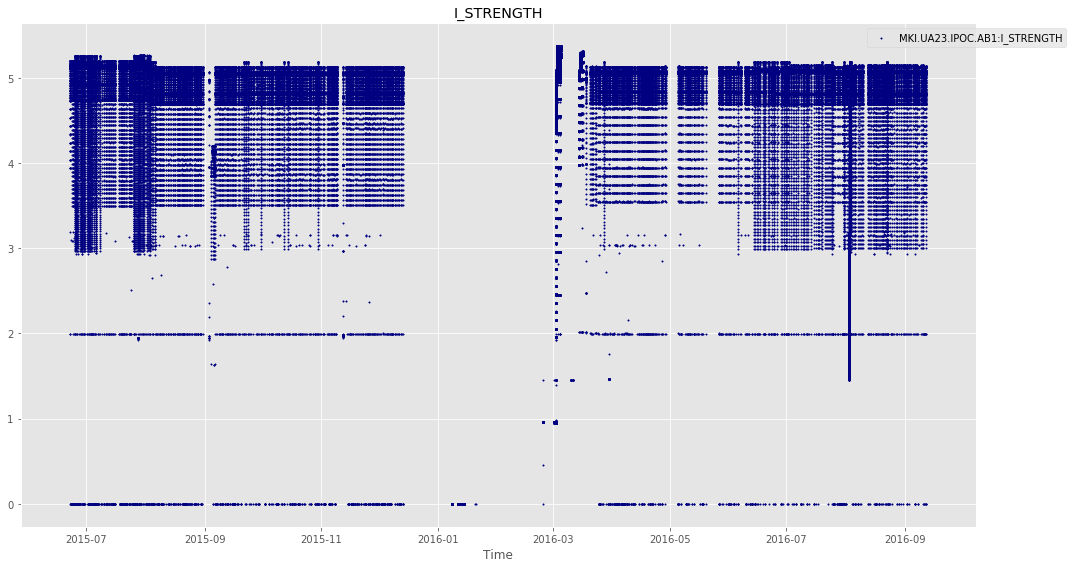

In [46]:
plot.data.ipoc(db.query(".*IPOC.*AB1:I_STRENGTH$"), "I_STRENGTH")

Fetching data for pattern .*STATE:SOFTSTARTSTATE$ from 2015-06-22 00:00:00 to 2016-09-14 00:00:00
Fetching data for MKI.UA87.STATE:SOFTSTARTSTATE
Fetching data for MKI.UA23.STATE:SOFTSTARTSTATE



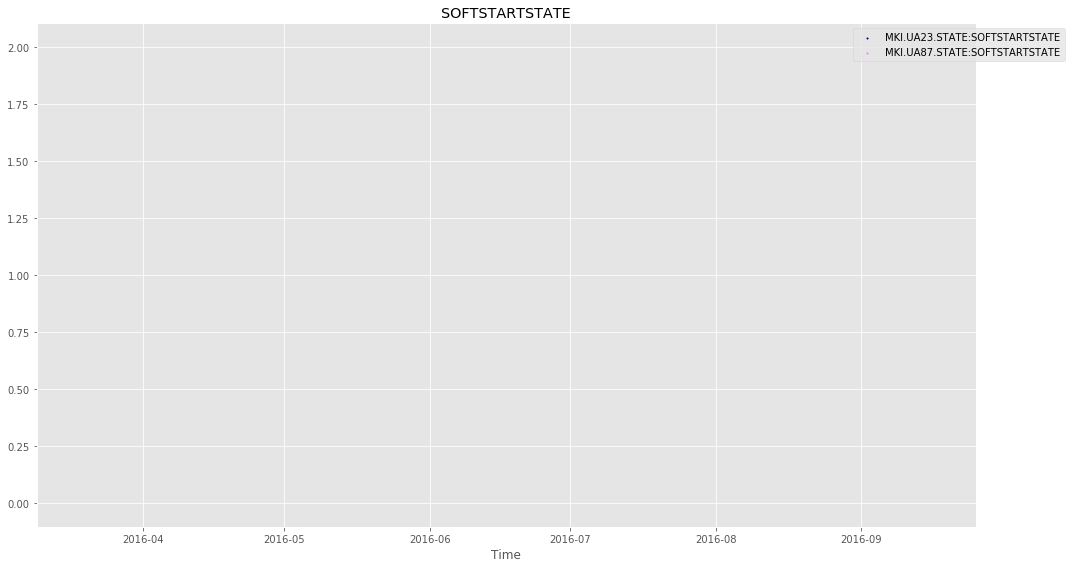

In [47]:
plot.data.ipoc(db.query(".*STATE:SOFTSTARTSTATE$"), "SOFTSTARTSTATE")

In [48]:
kick = db.query(".*UA23\.F3\.CONTROLLER:KICK_COUNT_TOPLAY$")

Fetching data for pattern .*UA23\.F3\.CONTROLLER:KICK_COUNT_TOPLAY$ from 2015-06-22 00:00:00 to 2016-09-14 00:00:00
Fetching data for MKI.UA23.F3.CONTROLLER:KICK_COUNT_TOPLAY



In [49]:
kick.index[kick.index.duplicated()]

DatetimeIndex(['2016-01-12 23:00:08.279000', '2016-01-12 23:00:18.279000',
               '2016-01-12 23:00:28.279000', '2016-01-12 23:00:38.279000',
               '2016-01-12 23:00:48.279000', '2016-01-12 23:00:58.279000',
               '2016-01-12 23:01:08.278000', '2016-01-12 23:01:18.278000',
               '2016-01-12 23:01:28.278000', '2016-01-12 23:01:38.278000',
               ...
               '2016-01-14 15:13:36.561000', '2016-01-14 15:13:46.560000',
               '2016-01-14 15:13:56.560000', '2016-01-14 15:14:06.560000',
               '2016-01-14 15:14:16.560000', '2016-01-14 15:14:26.560000',
               '2016-01-14 15:14:36.560000', '2016-01-14 15:14:46.560000',
               '2016-01-14 15:14:56.560000', '2016-01-14 15:15:04.667000'],
              dtype='datetime64[ns]', length=110077, freq=None)

In [50]:
kick.loc['2016-01-12 23:00:08.279000']

MKI.UA23.F3.CONTROLLER:KICK_COUNT_TOPLAY
2016-01-12 23:00:08.279                                      16.0
2016-01-12 23:00:08.279                                      16.0
2016-01-12 23:00:08.279                                      16.0
2016-01-12 23:00:08.279                                      16.0
2016-01-12 23:00:08.279                                      16.0
2016-01-12 23:00:08.279                                      16.0
2016-01-12 23:00:08.279                                      16.0
2016-01-12 23:00:08.279                                      16.0
2016-01-12 23:00:08.279                                      16.0

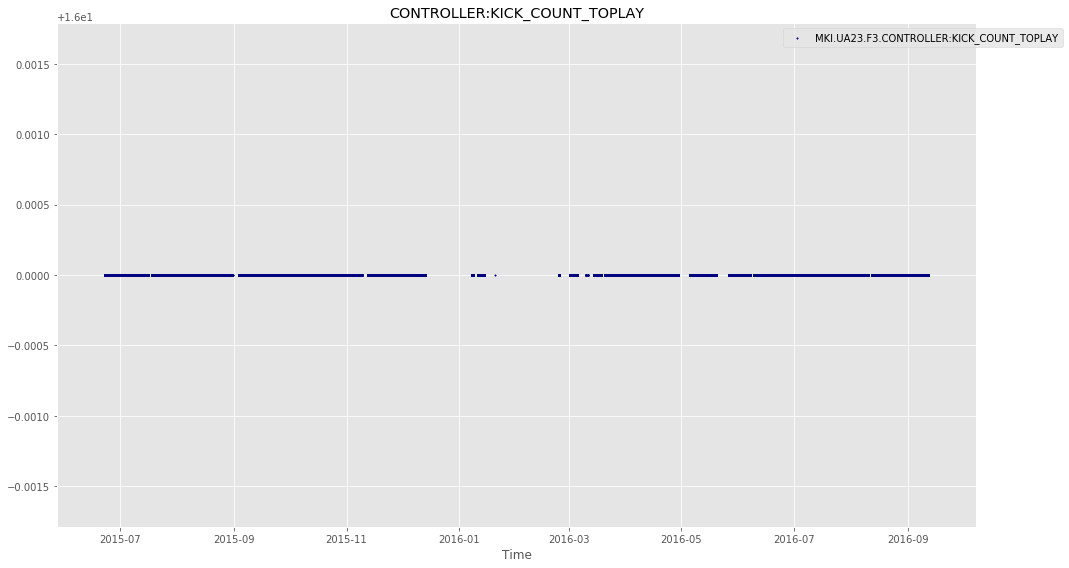

In [51]:
plot.data.ipoc(kick, "CONTROLLER:KICK_COUNT_TOPLAY")